INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


{'pressure': array(9, dtype=int32), 'end': array(1023, dtype=int32), 'flag': array(1, dtype=int32), 'control': array(30, dtype=int32), 'size': array(5, dtype=int32), 'blue': array(11, dtype=int32), 'green': array(15, dtype=int32), 'red': array(14, dtype=int32)}
canvas (64, 64, 3) 1.0 1.0
{'pressure': array(9, dtype=int32), 'end': array(1002, dtype=int32), 'flag': array(1, dtype=int32), 'control': array(1, dtype=int32), 'size': array(2, dtype=int32), 'blue': array(0, dtype=int32), 'green': array(0, dtype=int32), 'red': array(1, dtype=int32)}
canvas (64, 64, 3) 1.0 1.0
{'pressure': array(5, dtype=int32), 'end': array(1003, dtype=int32), 'flag': array(1, dtype=int32), 'control': array(15, dtype=int32), 'size': array(2, dtype=int32), 'blue': array(0, dtype=int32), 'green': array(0, dtype=int32), 'red': array(0, dtype=int32)}
canvas (64, 64, 3) 1.0 1.0
{'pressure': array(5, dtype=int32), 'end': array(174, dtype=int32), 'flag': array(1, dtype=int32), 'control': array(348, dtype=int32), 'size

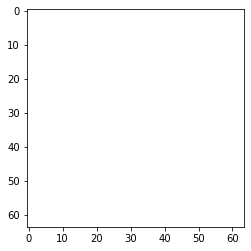

In [3]:
import matplotlib.pyplot as plt

import spiral.agents.default as default_agent
import spiral.agents.utils as agent_utils
import spiral.environments.libmypaint as libmypaint

import numpy as np

# The path to a TF-Hub module.
MODULE_PATH = "https://tfhub.dev/deepmind/spiral/default-wgangp-celebahq64-gen-19steps/agent4/1"
# The folder containing `libmypaint` brushes.
BRUSHES_PATH = "/home/rmqlife/work/spiral/third_party/mypaint-brushes-1.3.0/brushes"

# Here, we create an environment.
env = libmypaint.LibMyPaint(episode_length=20,
                            canvas_width=64,
                            grid_width=32,
                            brush_type="classic/dry_brush",
                            brush_sizes=[1, 2, 4, 8, 12, 24],
                            use_color=True,
                            use_pressure=True,
                            use_alpha=False,
                            background="white",
                            brushes_basedir=BRUSHES_PATH)


# Now we load the agent from a snapshot.
initial_state, step = agent_utils.get_module_wrappers(MODULE_PATH)

# Everything is ready for sampling.
state = initial_state()
noise_sample = np.random.normal(size=(10,)).astype(np.float32)

time_step = env.reset()
for t in range(19):
    time_step.observation["noise_sample"] = noise_sample
    action, state = step(time_step.step_type, time_step.observation, state)
    print(action)
    time_step = env.step(action)
    canvas = time_step.observation["canvas"]
    print('canvas', canvas.shape, np.min(canvas), np.max(canvas))

# Show the sample.
plt.close("all")
plt.imshow(time_step.observation["canvas"], interpolation="nearest")

In [5]:
print(BRUSHES_PATH)
!ls $BRUSHES_PATH

/home/rmqlife/work/spiral/third_party/mypaint-brushes-1.3.0/brushes
classic       FX_blender_prev.png     Makefile.am	    ramon
deevad	      kaerhon_v1	      order.conf	    tanda
experimental  label-brush-mypaint.sh  prev-template.xcf.gz
